## BÁO CÁO KẾT QUẢ CUỐI KỲ BÀI TẬP LỚN TRÍ TUỆ NHÂN TẠO
Lớp TTNT 154016 - G22


## Nội dung báo cáo
1. Thông tin chung
2. Đề xuất project
3. Chi tiết thực hiện chương trình
4. Tổng kết



## 1. Thông tin chung

### Thành viên
- Đào Bảo Ngọc 20224884: Xây dựng các hàm: phân loại theo mô hình KNN, hàm tính các metric để đánh giá, thực hiện Grid Search, Cross Validation để tìm tham số tốt nhất cho mô hình (30%)
- Nguyễn Huyền San 20225075: Tiền xử lí dữ liệu (làm sạch dữ liệu, lọc nhiễu), trực quan hóa dữ liệu (30%)
- Lương Thái Khang 20224866: Xây dựng các hàm tính khoảng cách, tiền xử lí dữ liệu (chuyển các trường dữ liệu dạng chữ về dạng số) (20%)
- Lý Hoài Nam 20220118: Trực quan hóa dữ liệu, resample cho tập dữ liệu (20%)

## 2. Đề xuất project

### Bài toán

Đề tài nhóm lựa chọn là bài toán học máy phân lớp dữ liệu sử dụng thuật toán K-NN (K Nearest Neighbors hay K Láng giềng gần nhất) và được ứng dụng trong thực tế với công việc dự đoán khả năng khách hàng lựa chọn gửi tiết kiệm tại ngân hàng. Giao dịch giữa khách hàng và ngân hàng là hoạt động ngày càng phổ biến. Dựa trên các thông tin về khách hàng(độ tuổi, nghề nghiệp, trình độ học vấn,…) để xây dựng nên thuật toán K-NN giúp dự đoán khả năng khách hàng sẽ sử dụng dịch vụ gửi tiết kiệm tại ngân hàng.

Mục tiêu của bài toán là từ một bộ dữ liệu mẫu đầu vào gồm các thông tin liên quan về khách hàng kèm với kết quả phân loại ứng với có gửi tiết kiệm hoặc không gửi tiết kiệm, cần huấn luyện một mô hình học máy cơ bản dựa trên tập dữ liệu đó để có thể tiến hành áp dụng trong thực tế đưa ra được dự đoán kết quả có/không gửi tiết kiệm dựa vào các thông tin liên quan đến khách hàng.


###Phương pháp: Thuật toán KNN (K - Nearest Neighbors)


K-nearest neighbor là một trong những thuật toán supervised-learning đơn giản nhất (mà hiệu quả trong một vài trường hợp) trong Machine Learning. Khi training, thuật toán này không học một điều gì từ dữ liệu training (đây cũng là lý do thuật toán này được xếp vào loại lazy learning), mọi tính toán được thực hiện khi nó cần dự đoán kết quả của dữ liệu mới. K-nearest neighbor có thể áp dụng được vào cả hai loại của bài toán Supervised learning là Classification và Regression. KNN còn được gọi là một thuật toán Instance-based hay Memory-based learning.

Với KNN, trong bài toán Classification, label của một điểm dữ liệu mới (hay kết quả của câu hỏi trong bài thi) được suy ra trực tiếp từ K điểm dữ liệu gần nhất trong training set. Label của một test data có thể được quyết định bằng major voting (bầu chọn theo số phiếu) giữa các điểm gần nhất, hoặc nó có thể được suy ra bằng cách đánh trọng số khác nhau cho mỗi trong các điểm gần nhất đó rồi suy ra label.

Thuật toán KNN cho rằng những dữ liệu tương tự nhau sẽ tồn tại gần nhau trong một không gian, từ đó công việc của chúng ta là sẽ tìm k điểm gần với dữ liệu cần kiểm tra nhất. Việc tìm khoảng cách giữa 2 điểm củng có nhiều công thức có thể sử dụng, tùy trường hợp mà chúng ta lựa chọn cho phù hợp. Đối với phạm vi của đề tài nhóm thực hiện, nhóm sử dụng các độ đo khoảng cách: Euclide, Manhattan, Cosine similarity, sau đó sử dụng phương pháp Grid Search để tìm ra độ đo có ảnh hưởng tốt nhất đối với kết quả của bài toán.


## 3. Báo cáo tiến độ giữa kì

### 3.1. Giới thiệu về Dataset sử dụng cho thuật toán

Tập dữ liệu sử dụng cho thuật toán là tập dữ liệu Term Deposit gồm 45212 dữ liệu bao gồm thông tin về khách hàng với 17 trường thông tin:


*   ID: Mã khách hàng
*   Age: Tuổi
*   Job: Nghề nghiệp
*   Marital: Tình trạng hôn nhân
*   Education: Trình độ giáo dục
*   Default
*   Balance
*   Housing
*   Loan
*   Contact: Thông tin liên lạc
*   Day: Ngày liên lạc gần nhất
*   Month: Tháng liên lạc gấn nhất
*   Duration
*   Campaign
*   pdays: Thời gian kể từ ngày liên lạc gần nhất
*   Previous
*   Poutcome

Và trường thông tin thứ 18 là Outcome - Kết quả phân loại với yes - có gửi tiết kiệm và no - không gửi tiết kiệm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/BTL AI (update)/

Mounted at /content/drive
/content/drive/MyDrive/BTL AI (update)


### 3.2. Khai báo một số thư viện hỗ trợ


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### 3.3. Tiền xử lý số liệu

Hiển thị thông tin dữ liệu

In [ ]:
data = pd.read_csv('Term Deposit.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Id
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no,NaN
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no,NaN
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,NaN
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no,NaN
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55206,45.0,management,single,tertiary,no,227.0,no,no,cellular,18,may,351,1,84,0,unknown,yes,56207.0
55207,50.0,management,married,tertiary,no,116.0,yes,no,cellular,18,jul,300,1,-1,0,unknown,yes,56208.0
55208,50.0,retired,single,tertiary,no,91.0,yes,no,cellular,23,jun,178,1,-1,0,failure,yes,56209.0
55209,25.0,management,married,tertiary,no,2785.0,yes,no,cellular,31,feb,265,2,-1,0,unknown,yes,56210.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55211 entries, 0 to 55210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        55202 non-null  float64
 1   job        55211 non-null  object 
 2   marital    55211 non-null  object 
 3   education  55211 non-null  object 
 4   default    55211 non-null  object 
 5   balance    55208 non-null  float64
 6   housing    55211 non-null  object 
 7   loan       55211 non-null  object 
 8   contact    55211 non-null  object 
 9   day        55211 non-null  int64  
 10  month      55211 non-null  object 
 11  duration   55211 non-null  int64  
 12  campaign   55211 non-null  int64  
 13  pdays      55211 non-null  int64  
 14  previous   55211 non-null  int64  
 15  poutcome   55211 non-null  object 
 16  y          55211 non-null  object 
 17  Id         10000 non-null  float64
dtypes: float64(3), int64(5), object(10)
memory usage: 7.6+ MB


Trường "Id là thứ tự của các dữ liệu, không có ý nghĩa trong việc xây dựng mô hình, do đó ta có thể xóa trường "Id"

In [ ]:
del data['Id']

Số lượng các giá trị null đối với từng trường dữ liệu

In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
age,9
job,0
marital,0
education,0
default,0
balance,3
housing,0
loan,0
contact,0
day,0


Loại bỏ các dữ liệu có giá trị null ở một trường nào đó

In [ ]:
#drop null
data1 = data.dropna()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55200 entries, 0 to 55210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        55200 non-null  float64
 1   job        55200 non-null  object 
 2   marital    55200 non-null  object 
 3   education  55200 non-null  object 
 4   default    55200 non-null  object 
 5   balance    55200 non-null  float64
 6   housing    55200 non-null  object 
 7   loan       55200 non-null  object 
 8   contact    55200 non-null  object 
 9   day        55200 non-null  int64  
 10  month      55200 non-null  object 
 11  duration   55200 non-null  int64  
 12  campaign   55200 non-null  int64  
 13  pdays      55200 non-null  int64  
 14  previous   55200 non-null  int64  
 15  poutcome   55200 non-null  object 
 16  y          55200 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 7.6+ MB


Thống kê về bộ dữ liệu sau khi loại bỏ những giá trị null

In [ ]:
data1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,55200.000000,55200.000000,55200.000000,55200.000000,55200.000000,55200.000000,55200.000000
mean,40.495725,1373.025779,15.681812,279.463351,2.609964,39.551739,0.563134
std,11.442400,2838.415931,8.432402,251.317207,2.878062,94.904418,2.119844
min,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,108.000000,8.000000,115.000000,1.000000,-1.000000,0.000000
50%,38.000000,503.000000,16.000000,204.000000,2.000000,-1.000000,0.000000
75%,48.000000,1545.000000,21.000000,365.000000,3.000000,-1.000000,0.000000
max,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Quan sát tập dữ liệu ta nhận thấy, ở một số trường dữ liệu, tồn tại những giá trị vô lí so với thực tế, ví dụ như tuổi của con người không thể là một số âm, hay là một giá trị rất lớn đến phi thực tế. Bên cạnh đó, tập dữ liệu còn tồn tại những hàng mà trong đó có những giá trị chưa được điền, hay chưa biết. Do đó, ta sẽ tiến hành xóa bỏ những trường dữ liệu này khỏi tập dữ liệu sử dụng cho bài toán.
Ta tiến hành xóa các hàng dữ liệu dựa trên giá trị 'age', 'balance', 'job' và 'education'.

In [ ]:
data2 = data1[data1['age']>1]
data2 = data2[data2['age']<100]
data3 = data2[data2['balance']>0]
data3 = data3[data3['job'] != 'unknown']
data3 = data3[data3['education'] != 'unknown']
data3.describe()

,age,balance,day,duration,campaign,pdays,previous
count,46183.000000,46183.000000,46183.000000,46183.000000,46183.000000,46183.000000,46183.000000
mean,40.287985,1598.779053,15.573523,285.007600,2.539701,41.003984,0.590087
std,10.715483,2964.023097,8.407867,251.603043,2.705297,95.363437,2.210370
min,18.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,238.000000,8.000000,119.000000,1.000000,-1.000000,0.000000
50%,38.000000,664.000000,16.000000,211.000000,2.000000,-1.000000,0.000000
75%,48.000000,1808.000000,21.000000,377.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000


Sau khi loại bỏ các điểm dữ liệu bị thiếu giá trị, hay tồn tại những giá trị phi thực tế, ta cần xem xét để loại bỏ nhiễu, hay các điểm ngoại lai (outliers). Thuật toán KNN rất nhạy cảm với những dữ liệu ngoại lai, do đó để đảm bảo kết quả tốt nhất, cần loại bỏ những điểm ngoại lai này ra khỏi tập dữ liệu

Sử dụng biểu đồ Boxplot cho các trường dữ liệu được chọn để quan sát phân bố của dữ liệu và các điểm ngoại lai của từng trường dữ liệu


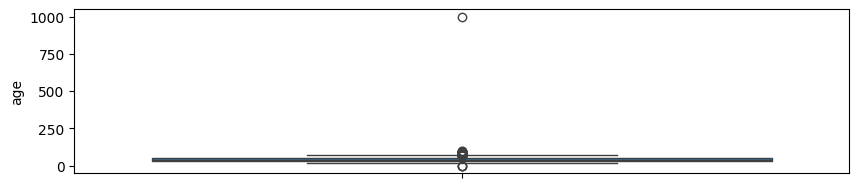

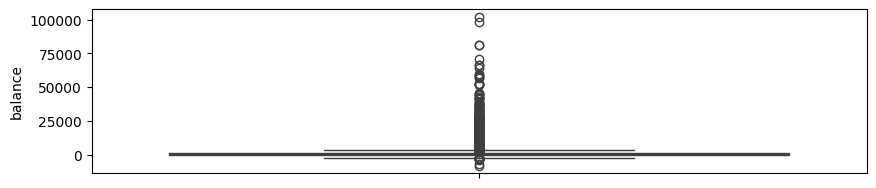

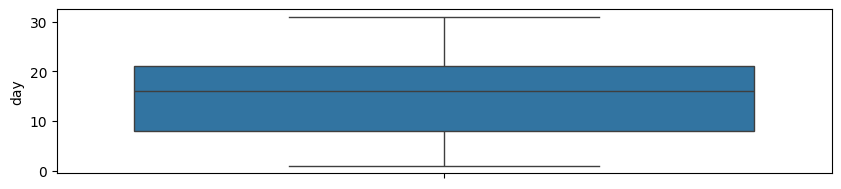

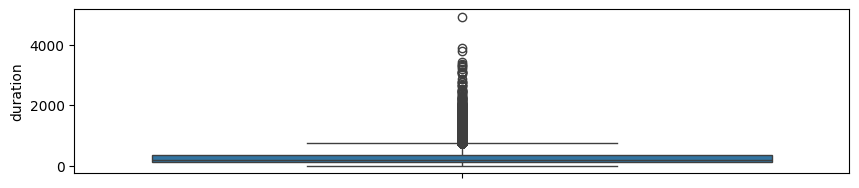

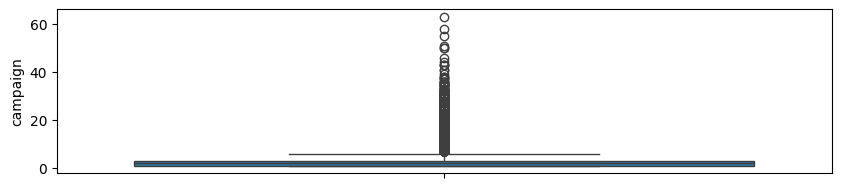

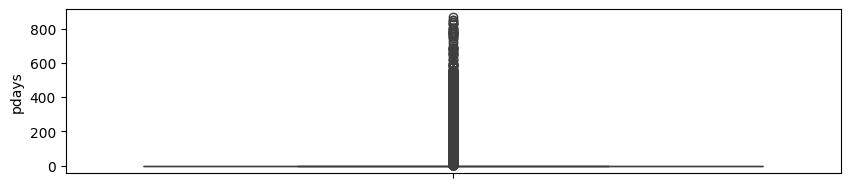

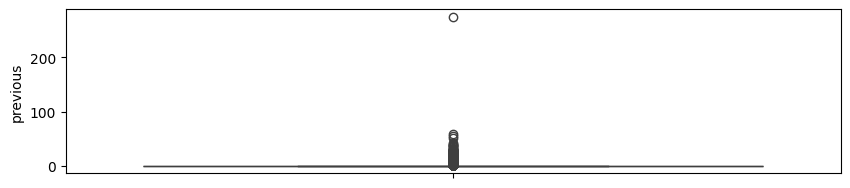

In [ ]:
vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i,var in enumerate(vars):
  plt.figure(figsize = [10,20])
  plt.subplot(8,1,i+1)
  sns.boxplot(data1[var])

Tiến hành lọc bỏ các dữ liệu ngoại lai bằng phương pháp sử dụng giá trị trung bình (mean) và độ lệch chuẩn (standard deviation - std). Trong bài toán này, ta chọn ngưỡng là 1, do vậy, ta sẽ loại bỏ các dữ liệu nằm ngoài khoảng [mean-std, mean+std] đối với từng trường dữ liệu.

In [ ]:
# remove outliers
vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for var in vars:
  mean = data3[var].mean()
  std = data3[var].std()
  data3 = data3[data3[var]>mean-std]
  data3 = data3[data3[var]<mean+std]
data3.describe()

,age,balance,day,duration,campaign,pdays,previous
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,38.549660,947.317881,15.616740,211.879956,1.881558,3.016119,0.032439
std,6.236489,999.515860,4.466141,124.732149,0.975769,20.389259,0.177172
min,30.000000,1.000000,8.000000,25.000000,1.000000,-1.000000,0.000000
25%,33.000000,205.000000,12.000000,112.000000,1.000000,-1.000000,0.000000
50%,37.000000,556.000000,16.000000,184.000000,2.000000,-1.000000,0.000000
75%,44.000000,1375.000000,20.000000,290.000000,2.000000,-1.000000,0.000000
max,51.000000,4297.000000,23.000000,536.000000,4.000000,150.000000,1.000000


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 1156 to 55208
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        9988 non-null   float64
 1   job        9988 non-null   object 
 2   marital    9988 non-null   object 
 3   education  9988 non-null   object 
 4   default    9988 non-null   object 
 5   balance    9988 non-null   float64
 6   housing    9988 non-null   object 
 7   loan       9988 non-null   object 
 8   contact    9988 non-null   object 
 9   day        9988 non-null   int64  
 10  month      9988 non-null   object 
 11  duration   9988 non-null   int64  
 12  campaign   9988 non-null   int64  
 13  pdays      9988 non-null   int64  
 14  previous   9988 non-null   int64  
 15  poutcome   9988 non-null   object 
 16  y          9988 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 1.4+ MB


Để cho kết quả phân loại tốt nhất, cần phải tận dụng tối đa thông tin từ tập dữ liệu. Tuy nhiên, thuật toán KNN chỉ có thể làm việc với dữ liệu dạng số. Do đó, ta cần phải số hóa các trường dữ liệu dạng chữ.

Chuyển giá trị output từ 'yes', 'no' sang dữ liệu nhị phân trong đó 1 ứng với 'yes', 0 ứng với 'no'.

In [ ]:
data3['y'] = data3['y'].where(data3['y'] != 'no', 0)
data3['y'] = data3['y'].where(data3['y'] != 'yes', 1)
data3['y'] = data3['y'].astype(int)

Chuẩn hóa dữ liệu trong thuật toán KNN (K-Nearest Neighbors) là một bước quan trọng vì KNN dựa trên khoảng cách giữa các điểm dữ liệu để xác định "hàng xóm gần nhất". Điều này giúp các đặc trưng đóng góp cân bằng vào khoảng cách, tránh việc một đặc trưng nào đó thống trị. Nếu các đặc trưng (features) có phạm vi giá trị hoặc đơn vị đo lường khác nhau, các đặc trưng có giá trị lớn hơn sẽ chi phối hoàn toàn việc tính toán khoảng cách, làm giảm tầm quan trọng của các đặc trưng khác. Ví dụ, khi so sánh "age" (18-72) với "balance" (1-11149), "balance" sẽ áp đảo trong tính toán khoảng cách nếu dữ liệu không được chuẩn hóa.

MinMaxScaler giúp đưa tất cả các đặc trưng về cùng một phạm vi (thường là [0,1]) bằng cách sử dụng công thức:

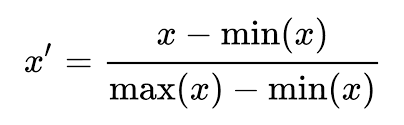



Chuẩn hóa các trường 'age', 'balance', 'duration' bằng MinMaxScaler

In [ ]:
vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays']
for c in vars:
  max = data3[c].max()
  min = data3[c].min()
  data3[c] = (data3[c]-min)/(max-min)
data3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1156,0.857143,technician,married,secondary,no,0.167365,yes,no,unknown,0.000000,may,0.297456,0.666667,0.000000,0,unknown,0
1157,0.047619,blue-collar,married,tertiary,no,0.657821,yes,no,unknown,0.000000,may,0.416830,0.666667,0.000000,0,unknown,0
1161,0.952381,blue-collar,married,primary,no,0.084032,yes,no,unknown,0.000000,may,0.344423,0.333333,0.000000,0,unknown,0
1162,0.047619,self-employed,single,tertiary,no,0.027700,yes,no,unknown,0.000000,may,0.418787,0.333333,0.000000,0,unknown,0
1163,0.095238,admin.,single,secondary,no,0.020484,yes,yes,unknown,0.000000,may,0.553816,0.666667,0.000000,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55204,0.190476,management,married,primary,no,0.256750,no,no,cellular,0.666667,aug,0.845401,0.333333,0.841060,0,unknown,1
55205,0.047619,self-employed,married,secondary,no,0.109404,no,no,cellular,0.400000,apr,0.726027,1.000000,0.980132,1,unknown,1
55206,0.714286,management,single,tertiary,no,0.052607,no,no,cellular,0.666667,may,0.637965,0.000000,0.562914,0,unknown,1
55207,0.952381,management,married,tertiary,no,0.026769,yes,no,cellular,0.666667,jul,0.538160,0.000000,0.000000,0,unknown,1


Cần tận dụng tối đa thông tin từ tập dữ liệu để đạt được kết quả tốt nhất. Tuy nhiên, thuật toán KNN không thể thực hiện trên các trường dữ liệu dạng chữ. Do đó, cần phải số hóa các trường dữ liệu này bằng One-hot Encoding.

One-Hot Encoding chuyển đổi mỗi giá trị phân loại thành một vector nhị phân. Phương pháp này giúp giữ nguyên thông tin mà không tạo ra thứ bậc giả giữa các giá trị như trong Label Encoding (gán số nguyên). Điều này rất quan trọng vì nếu không chuẩn hóa, các giá trị sẽ gây hiểu nhầm rằng có mối quan hệ thứ bậc giữa chúng, làm sai lệch tính toán khoảng cách. Hơn nữa, sau One-Hot Encoding, mỗi giá trị phân loại trở thành một chiều riêng biệt trong không gian vector, đảm bảo các biến phân loại có đóng góp hợp lý vào việc tính toán khoảng cách cùng với các biến số (numerical features). Phương pháp này cũng giảm nguy cơ thiên lệch, vì mọi giá trị đều có trọng số tương đương thay vì bị chi phối bởi các giá trị lớn hơn. Điều này đặc biệt hữu ích khi tích hợp dữ liệu hỗn hợp giữa biến số và biến phân loại, giúp KNN hoạt động hiệu quả hơn.

Ta tiến hành áp dụng one-hot encoding cho các trường dữ liệu dạng chữ: ['job', 'marital', 'education', 'contact', 'poutcome','month', 'default', 'housing',	'loan']

In [ ]:
categories = ['job', 'marital', 'education', 'contact', 'poutcome','month', 'default', 'housing',	'loan']
data3 = pd.get_dummies(data3, columns=categories, dtype = int)
data3

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
1156,0.857143,0.167365,0.000000,0.297456,0.666667,0.000000,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
1157,0.047619,0.657821,0.000000,0.416830,0.666667,0.000000,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
1161,0.952381,0.084032,0.000000,0.344423,0.333333,0.000000,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
1162,0.047619,0.027700,0.000000,0.418787,0.333333,0.000000,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
1163,0.095238,0.020484,0.000000,0.553816,0.666667,0.000000,0,0,1,0,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55204,0.190476,0.256750,0.666667,0.845401,0.333333,0.841060,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
55205,0.047619,0.109404,0.400000,0.726027,1.000000,0.980132,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0
55206,0.714286,0.052607,0.666667,0.637965,0.000000,0.562914,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
55207,0.952381,0.026769,0.666667,0.538160,0.000000,0.000000,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


### 3.3. Trực quan hóa số liệu bằng biểu đồ

Biểu đồ Probplot cho từng trường dữ liệu được chọn

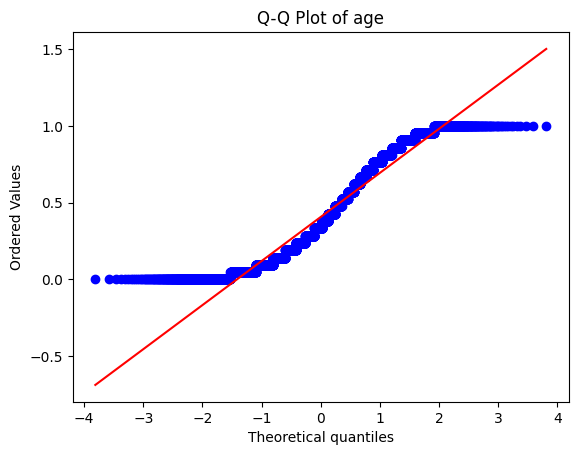

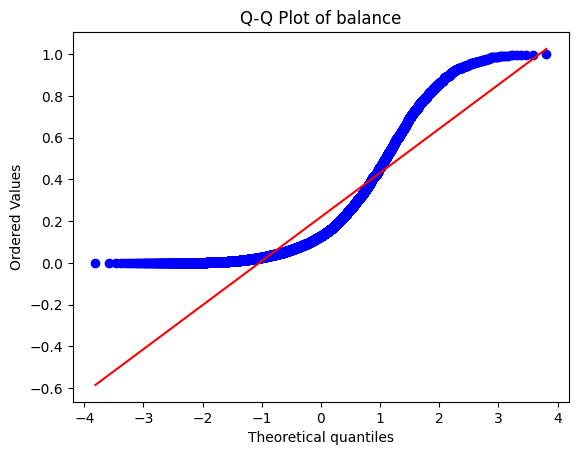

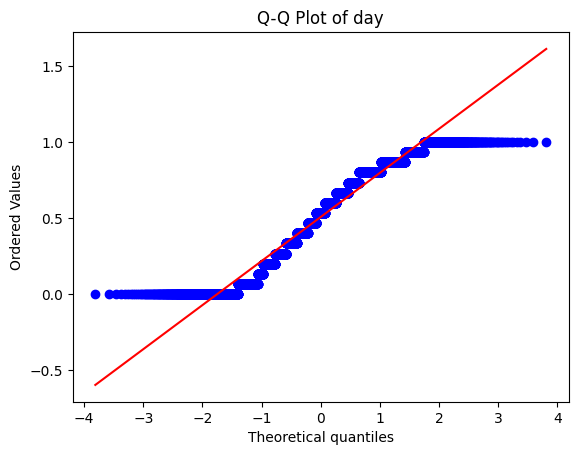

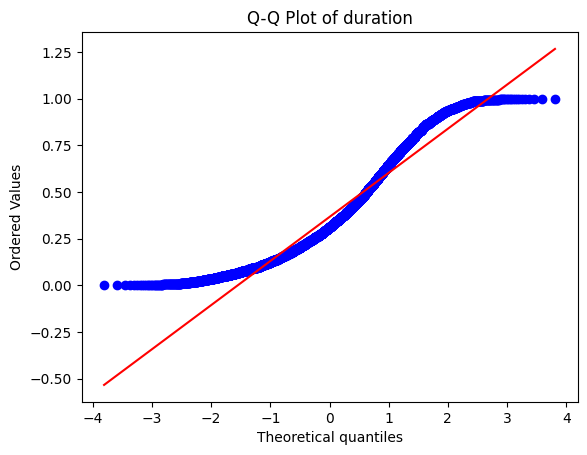

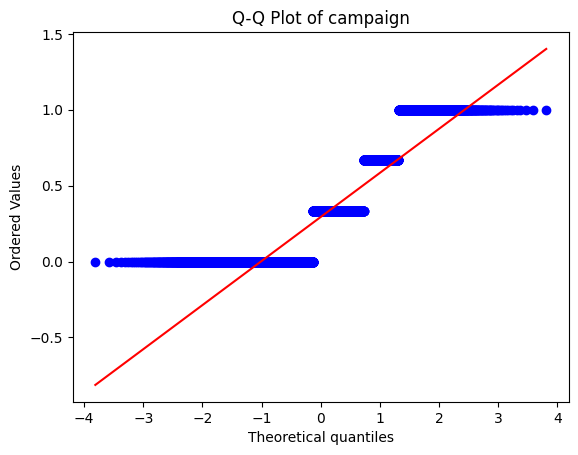

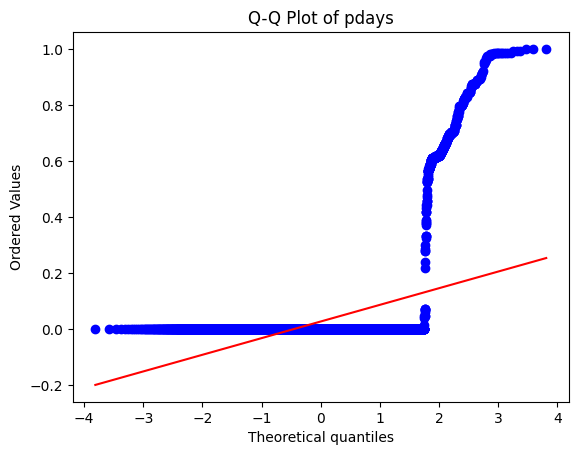

In [ ]:
vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays']
for var in vars:
  stats.probplot(data3[var],dist='norm',plot=plt)
  plt.title(f'Q-Q Plot of {var}')
  plt.show()

Từ các biểu đồ trên có thể thấy, các trường 'age', 'balance', 'day', 'duration' đã được chuẩn hóa và tuân theo một phân bố nào đó, trong khi trường 'campaign' và 'pdays', phân bố của dữ liệu còn tương đối phức tạp.

Biểu diễn số liệu phân nhãn theo số lượng

<Axes: xlabel='y', ylabel='count'>

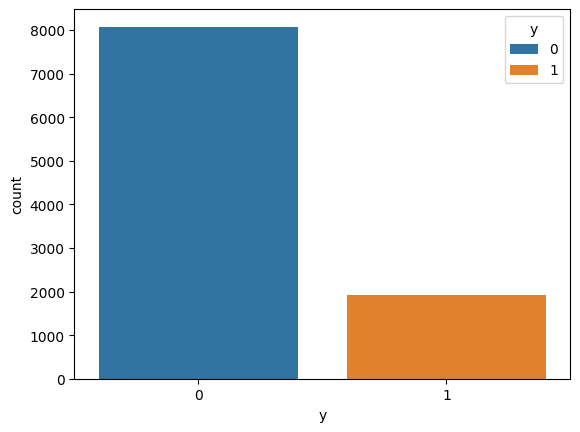

In [ ]:
sns.countplot(x = data3['y'], data = data3 , hue = data3['y'])

Dựa vào biểu đồ trên, ta có thể thấy sự mất cân bằng trong tập dữ liệu: dữ liệu mang nhãn 0 xuất hiện nhiều hơn dữ liệu mang nhãn 1. Ta cần phải lưu ý để khắc phục điều này trong phần xây dựng mô hình phân loại. Đây là vấn đề chính cần phải cải thiện để đảm bảo kết quả của mô hình phân loại.

## 4. Cập nhật kết quả cuối kì

Tiếp tục với dữ liệu đã xử lí ở trên, tiếp theo, ta sẽ sử dụng dữ liệu cho việc xây dựng mô hình phân loại KNN

## 4.1. Xây dụng hàm tính toán

Thuật toán KNN phân loại dựa vào các láng giềng gần nhất, mà trong đó các láng giềng được xác định bằng khoảng cách. Trong bài toán này, ta sẽ thực hiện thuật toán KNN với ba độ đo khoảng cách Euclidean (chuẩn L2), Manhattan (chuẩn L1) và Cosine Similarity.

Hàm tính khoảng cách Euclidean:

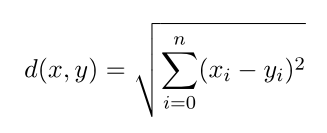

In [ ]:
# Hàm tính khoảng cách Euclidean
def euclidean_distance(train_dt, test_dt):
    num_train = train_dt.shape[0]
    num_test = test_dt.shape[0]
    dists_euclidean = np.zeros((num_test, num_train))
    for i in range(num_test):
      dists_euclidean[i] = np.sqrt(np.sum(np.square(train_dt - test_dt[i]), axis = 1))
    return dists_euclidean

Hàm tính Cosine Similarity:

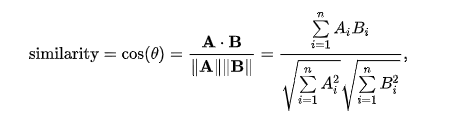

In [ ]:
# Hàm tính Cosine Similarity
def cosine_similarity(train_dt, test_dt):
    dot_product = np.dot(test_dt, train_dt.T)

    train_norm = np.linalg.norm(train_dt, axis=1)
    test_norm = np.linalg.norm(test_dt, axis=1)

    norms_product = np.outer(test_norm, train_norm)
    return dot_product / norms_product

Hàm tính khoảng cách Manhattan:

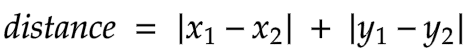

In [ ]:
# Hàm tính khoảng cách Manhattan
def manhattan_distnce(train_dt, test_dt):
    num_train = train_dt.shape[0]
    num_test = test_dt.shape[0]
    dists_manhattan = np.zeros((num_test, num_train))
    for i in range(num_test):
      dists_manhattan[i] = np.sum(np.abs(train_dt - test_dt[i]), axis = 1)
    return dists_manhattan

Hàm tính toán độ chính xác

In [ ]:
def compute_accuracy(pred, true):
  return np.sum(pred == true) / len(true)
def compute_other_metric(pred, true):
    pred = np.array(pred)
    true = np.array(true)

    tp = np.sum((pred == 1) & (true == 1))  # True Positives
    fp = np.sum((pred == 1) & (true == 0))  # False Positives
    tn = np.sum((pred == 0) & (true == 0))  # True Negatives
    fn = np.sum((pred == 0) & (true == 1))  # False Negatives

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)

    return precision, recall, f1

def confusion_matrix(pred, true):
    pred = np.array(pred)
    true = np.array(true)

    tp = np.sum((pred == 1) & (true == 1))  # True Positives
    fp = np.sum((pred == 1) & (true == 0))  # False Positives
    tn = np.sum((pred == 0) & (true == 0))  # True Negatives
    fn = np.sum((pred == 0) & (true == 1))  # False Negatives

    cm = np.array([[tp,fn],
                   [fp,tn]])

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels = [1,0], yticklabels = [1,0])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix (Multiclass)')
    plt.show()


Chia tập dữ liệu thành 2 phần: train và test, trong đó training data chiếm 70%.

In [ ]:
X_train, X_test = train_test_split (data3, test_size = 0.3, random_state = 42, stratify = data3['y'])
y_train = X_train['y']
X_train = X_train.drop('y', axis=1)
y_test = X_test['y']
X_test = X_test.drop('y', axis=1)

### 4.2. Phương pháp resampling
Do tập dữ liệu sử dụng trong bài toán có sự mất cân bằng giữa dữ liệu thuộc hai nhãn, nên ta cần phải sử dụng phương pháp resampling để làm cho tập dữ liệu cân bằng giữa hai nhãn. Ta có thể xem xét hai phương pháp: oversampling - tăng thêm số lượng dữ liệu ở nhãn thiểu số, và undersampling - giảm đi dữ liệu ở nhãn đa số. Trong bài toán này, nhóm sử dụng phương pháp SMOTE để oversample và NearMiss để undersample.




1.   Sử dụng SMOTE để cân bằng dữ liệu bằng cách nhân thêm các số liệu ở lớp thiểu số:
* Chọn một mẫu từ lớp thiểu số.
* Tìm 𝑘 hàng xóm gần nhất (nearest neighbors).
Tạo điểm mới nằm trên đường nối giữa mẫu ban đầu và một trong những hàng xóm được chọn.
---
2.   Sử dụng NearMiss để giảm bớt số liệu của các lớp phổ biến để cân bằng dữ liệu:

* Giữ lại các điểm từ lớp đa số gần lớp thiểu số nhất dựa trên khoảng cách.
* Có nhiều phiên bản (NearMiss-1, NearMiss-2, NearMiss-3), tùy thuộc vào cách chọn điểm:

   * NearMiss-1: Chọn các điểm lớp đa số có khoảng cách trung bình gần nhất với các điểm lớp thiểu số.
   * NearMiss-2: Chọn các điểm có khoảng cách trung bình xa nhất đến các điểm lớp đa số.
   * NearMiss-3: Chọn điểm dựa trên số lượng hàng xóm gần nhất.






In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

smote = SMOTE(random_state=42)
nearmiss = NearMiss()

X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X_train, y_train)

Biểu diễn số liệu phân nhãn theo số lượng sau khi đã cân bằng:



1. Biểu diễn dữ liệu sau khi dùng SMOTE để cân bằng

<Axes: xlabel='y', ylabel='count'>

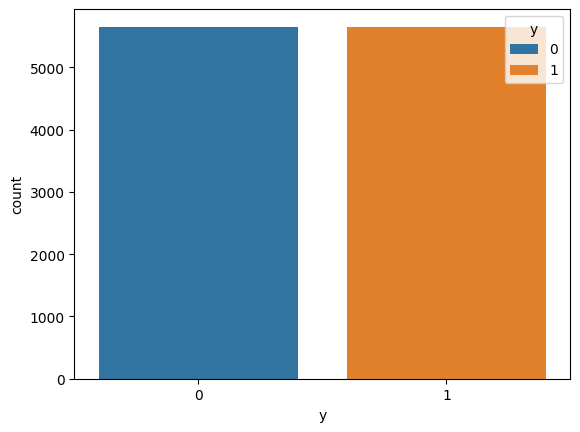

In [ ]:
sns.countplot(x = y_smote, hue = y_smote)

2. Biểu diễn dữ liệu dau khi dùng NearMiss để cân bằng

<Axes: xlabel='y', ylabel='count'>

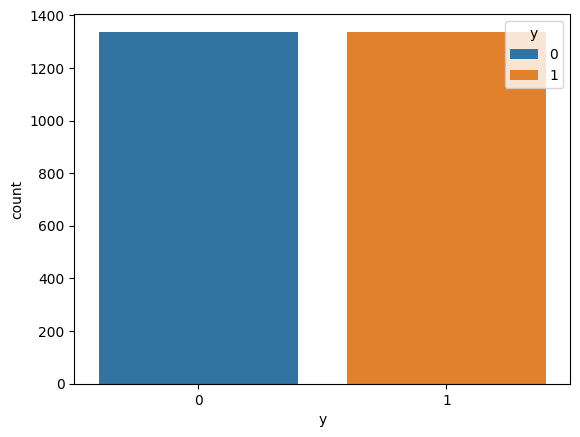

In [ ]:
sns.countplot(x = y_nearmiss, hue = y_nearmiss)

### 4.3. Xây dựng hàm phân loại bằng thuật toán KNN

Hàm phân loại KNN theo khoảng cách bằng phương pháp **Majority voting**


Majority Voting là phương pháp quyết định nhãn của một điểm dữ liệu mới trong thuật toán KNN dựa trên nhãn của k hàng xóm gần nhất. Khi cần phân loại một điểm x, thuật toán sẽ thực hiện các bước sau: Đầu tiên, tìm k hàng xóm gần nhất của x bằng cách tính khoảng cách (như Euclidean, Manhattan, hoặc Cosine) giữa x và các điểm trong tập huấn luyện. Sau đó, kiểm tra nhãn của k hàng xóm này. Cuối cùng, nhãn của x được xác định là nhãn xuất hiện nhiều nhất trong số k hàng xóm.

In [ ]:
def knn_classifier(train_dt, test_dt, y_train, k=1, metric='euclidean'):
    num_test = test_dt.shape[0]
    train_dt_array = train_dt.to_numpy()
    test_dt_array = test_dt.to_numpy()
    y_pred = np.zeros(num_test)
    if metric == 'euclidean':
        dists = euclidean_distance(train_dt_array, test_dt_array)
    elif metric == 'cosine':
        dists = cosine_similarity(train_dt_array, test_dt_array)
    elif metric == 'manhattan':
        dists = manhattan_distnce(train_dt_array, test_dt_array)
    label = y_train.tolist()
    for i in range(num_test):
      closest = []
      k_indices = np.argsort(dists[i])[:k]
      closest = [label[j] for j in k_indices]
      #for j in k_indices:
      #  closest.append(label[j])
      num1 = sum(closest)
      num0 = k - num1
      if (num1 >= num0):
        y_pred[i] = 1
      else:
        y_pred[i] = 0
    return y_pred

Hàm phân loại KNN có trọng số bằng phương pháp **Weighted Voting**

Weighted Voting trong KNN là một phương pháp phân loại dựa trên việc gán trọng số cho các hàng xóm gần nhất của một điểm cần phân loại. Khác với phương pháp Majority Voting, trong đó mỗi hàng xóm đóng góp đều nhau vào việc xác định nhãn, Weighted Voting gán trọng số cho từng hàng xóm dựa trên khoảng cách của nó tới điểm cần phân loại. Các điểm gần hơn có trọng số cao hơn, trong khi các điểm xa hơn đóng góp ít hơn. Công thức tính trọng số được sử dụng:

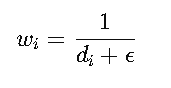

In [ ]:
e = 1e-6
def knn_classifier_weight(train_dt, test_dt, y_train, k=1, metric='euclidean'):
    num_test = test_dt.shape[0]
    train_dt_array = train_dt.to_numpy()
    test_dt_array = test_dt.to_numpy()
    y_pred = np.zeros(num_test)
    if metric == 'euclidean':
        dists = euclidean_distance(train_dt_array, test_dt_array)
    elif metric == 'cosine':
        dists = cosine_similarity(train_dt_array, test_dt_array)
    elif metric == 'manhattan':
        dists = manhattan_distnce(train_dt_array, test_dt_array)
    label = y_train.tolist()
    for i in range(num_test):
      closest = []
      k_indices = np.argsort(dists[i])[:k]
      weight0 = sum([1/(dists[i][j]+e) for j in k_indices if label[j]==0])
      weight1 = sum([1/(dists[i][j]+e) for j in k_indices if label[j]==1])
      """
      for j in k_indices:
        if label[j] == 0:
          weight0 += 1/(dists[i][j]+e)
        else:
          weight1 += 1/(dists[i][j]+e)
      """
      if weight0 > weight1:
        y_pred[i] = 0
      else:
        y_pred[i] = 1

    return y_pred

### 4.4. Thử nghiệm, lựa chọn phương pháp và tham số phù hợp

So sánh hiệu suất của KNN với các phương pháp Resampling

Kết quả khi sử dụng phương pháp SMOTE và phân loại bằng phương pháp Majority Voting

In [ ]:
y_pred = knn_classifier(X_smote, X_test, y_smote, k=30)
accuracy = compute_accuracy(y_pred, y_test)
precision, recall, f1 = compute_other_metric(y_pred, y_test)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall: .2f}')
print(f'F1: {f1: .2f}')

Accuracy: 0.83
Precision: 0.53
Recall:  0.78
F1:  0.63


Độ chính xác 0.83 là tương đối tốt, tuy nhiên, phương pháp Majority Voting coi các láng giềng có vai trò như nhau, nên kết quả trên chưa phải là tốt nhất. Ta có thể cải thiện bằng phương pháp Weighted Voting

Kết quả khi sử dụng phương pháp SMOTE và phân loại bằng phương pháp Weighted Voting



In [ ]:
y_pred = knn_classifier_weight(X_smote, X_test, y_smote, k=30)
accuracy = compute_accuracy(y_pred, y_test)
precision, l, f1 = compute_other_metric(y_pred, y_test)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall: .2f}')
print(f'F1: {f1: .2f}')

Accuracy: 0.86
Precision: 0.60
Recall:  0.78
F1:  0.67


Như vậy, phương pháp Weighted Voting có thể cải thiện kết quả từ 0.83 lên 0.86. Đặc biệt, nhờ phương pháp Weighted Voting chỉ số precision và f1 được cải thiện tương đối trong khi chỉ số recall vẫn giữ nguyên ở mức tốt.

Kết quả khi sử dụng phương pháp NearMiss và phân loại bằng phương pháp Majority Voting

In [ ]:
y_pred = knn_classifier(X_nearmiss, X_test, y_nearmiss, k=30)
accuracy = compute_accuracy(y_pred, y_test)
precision, recall, f1 = compute_other_metric(y_pred, y_test)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall: .2f}')
print(f'F1: {f1: .2f}')

Accuracy: 0.82
Precision: 0.53
Recall:  0.57
F1:  0.55


Kết quả khi sử dụng phương pháp NearMiss và phân loại bằng phương pháp Majority Voting

In [ ]:
y_pred = knn_classifier_weight(X_nearmiss, X_test, y_nearmiss, k=30)
accuracy = compute_accuracy(y_pred, y_test)
precision, recall, f1 = compute_other_metric(y_pred, y_test)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall: .2f}')
print(f'F1: {f1: .2f}')

Accuracy: 0.84
Precision: 0.57
Recall:  0.59
F1:  0.58


Kết quả cho thấy phương pháp SMOTE hiệu quả hơn so với NearMiss, phương pháp Weighted Voting tốt hơn Majority Voting. Trong các phần tiếp theo, ta sẽ sử dụng tập dữ liệu được resample bằng phương pháp SMOTE và phương pháp

Chọn tập SMOTE làm dữ liệu huấn luyện

In [ ]:
X_train = X_smote
y_train = y_smote

Tìm kiếm tham số tối ưu cho KNN bằng Grid Search và Cross Validation

* Grid Search là một kỹ thuật tối ưu hóa được sử dụng để tìm kiếm các siêu tham số tốt nhất cho một mô hình học máy. Phương pháp này thực hiện bằng cách thử nghiệm toàn bộ các tổ hợp tham số trong một lưới giá trị được chỉ định trước, sau đó đánh giá hiệu suất của mô hình với từng tổ hợp tham số để xác định tổ hợp tốt nhất.
* Cross Validation là một kỹ thuật đánh giá hiệu suất của mô hình học máy bằng cách chia dữ liệu thành nhiều phần để đảm bảo rằng mô hình được kiểm tra trên những dữ liệu chưa từng thấy trong quá trình huấn luyện. Phương pháp này giúp giảm thiểu hiện tượng overfitting và cung cấp ước lượng đáng tin cậy hơn về hiệu suất của mô hình trên dữ liệu mới.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


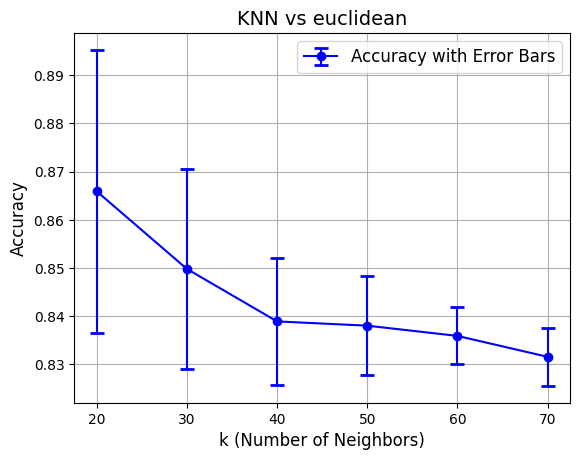

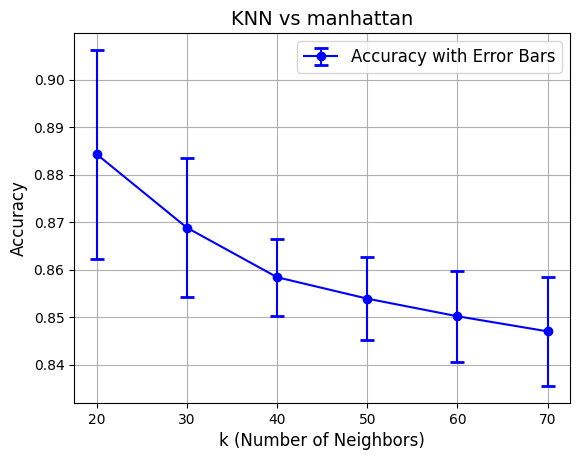

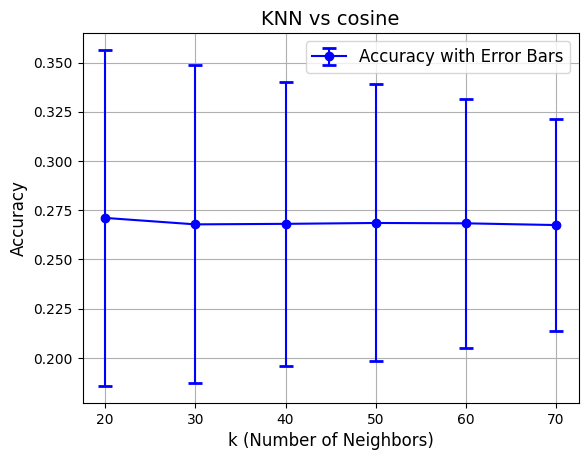

Best k: 20
Best metric: manhattan


In [ ]:
num_folds = 5
metrics = ['euclidean', 'manhattan', 'cosine']
k_choices = [20,30,40,50,60,70]

best_scores = 0
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
metric_results = {}

for metric in metrics:
  accuracy_scores = {}
  accuracy_std = {}
  for k in k_choices:
    accuracy_list = []
    for i in range(num_folds):
      X_test_fold = X_train_folds[i]
      y_test_fold = y_train_folds[i].to_numpy()

      X_train_fold = pd.concat([x for j, x in enumerate(X_train_folds) if j != i])
      y_train_fold = pd.concat([x for j, x in enumerate(y_train_folds) if j != i])

      y_pred_fold = knn_classifier_weight(X_train_fold, X_test_fold, y_train_fold, k=k, metric=metric)

      accuracy = compute_accuracy(y_test_fold, y_pred_fold)
      accuracy_list.append(accuracy)

    accuracy_scores[k] = np.mean(accuracy_list)
    accuracy_std[k] = np.std(accuracy_list)

    if (accuracy_scores[k] > best_scores):
      best_scores = accuracy_scores[k]
      best_k = k
      best_metric = metric

  plt.errorbar(k_choices, list(accuracy_scores.values()), yerr=list(accuracy_std.values()), fmt='o-', capsize=5, capthick=2,
             ecolor='blue', label='Accuracy with Error Bars', color='blue')

  # Labels and title
  plt.title(f'KNN vs {metric}', fontsize=14)
  plt.xlabel('k (Number of Neighbors)', fontsize=12)
  plt.ylabel('Accuracy', fontsize=12)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.legend(fontsize=12)
  plt.grid(True)

  # Show the plot
  plt.show()

print(f'Best k: {best_k}')
print(f'Best metric: {best_metric}')


Đánh giá mô hình KNN với các tham số tối ưu:
* Sử dụng tham số ***k***  và metric tốt nhất tìm được từ quá trình cross-validation
* Dự đoán nhãn cho dữ liệu kiểm tra (X_test) và tính toán độ chính xác của mô hình trên tập kiểm tra (y_test)

Bằng việc sử dụng Grid Search, kết hợp với Cross Validation để lựa chọn siêu tham số phù hợp, kết quả cho thấy, số láng giềng tốt nhất k = 20, độ đo phù hợp nhất là độ đo Manhattan.

Ta sẽ sử dụng k = 20 và độ đo Manhattan cho việc phân loại và đánh giá mô hình

Accuracy: 0.87
Precision: 0.65
Recall:  0.75
F1:  0.69


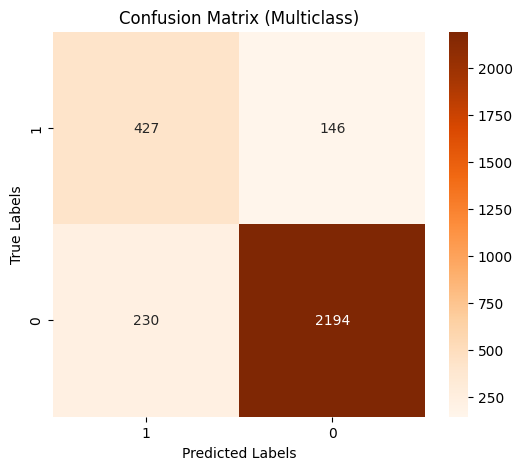

In [ ]:
y_pred = knn_classifier_weight(X_train, X_test, y_train, k=best_k, metric = best_metric)
accuracy = compute_accuracy(y_pred, y_test)
precision, recall, f1 = compute_other_metric(y_pred, y_test)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall: .2f}')
print(f'F1: {f1: .2f}')
confusion_matrix(y_pred, y_test)

Với số láng giềng là k = 20, độ đo Manhattan, phương pháp phân loại bằng KNN với Weighted Voting cho độ chính xác lên tới 0.87.

### 4.5. So sánh với kết quả khi sử dụng thư viện

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric, weights="distance")

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


Như vậy, kết quả mô hình KNN do nhóm đề xuất đạt độ chính xác ngang với mô hình KNN được tạo trong thư viện scikit-learn

## 5. Tổng kết
Sau quá trình tìm hiểu và thực hiện thuật toán KNN (K-Nearest Neighbor), nhóm đã thành công xây dựng được một mô hình học máy cơ bản giải quyết bài toán phân loại. So với mục tiêu đặt ra, két quả của quá trình phân loại đã đạt tỉ lệ chính xác tương đối tốt: 87%.

Trong quá trình tìm hiểu, nhóm nhận thấy, để triển khai thuật toán KNN hiệu quả, cần phải tiền xử lí dữ liệu để lọc nhiễu và chuẩn hóa, do mô hình KNN rất nhạy cảm với sự không đồng đều, hoặc sự chiếm ưu thế của một trường dữ liệu nào đó. Sự thiếu trật tự của dữ liệu (dữ liệu không tuân theo một phân phối nào đó) cũng có thể gây ảnh hưởng đến tính chính xác của mô hình. Bên cạnh đó, phương pháp Weighted Voting hoạt động hiệu quả hơn so với phương pháp Majority Voting thông thường, do Majority Voting đánh giá các láng giềng như nhau.

Trong thực tế, sẽ còn phải gặp nhiều điều khó khăn khác như bộ dữ liệu đầu vào phức tạp với số lượng bản ghi lớn, sự chênh lệch rất rõ rệt giữa dữ liệu thuộc các lớp, số lượng các trường thông tin nhiều với miền giá trị biến động, các nhãn phân loại đa dạng. Việc áp dụng thuật toán đề ra trong báo cáo chắc chắn sẽ không thể thu được kết quả tối ưu. Ngoài ra thuật toán KNN vẫn còn là thuật toán đơn giản nên đối với các bài toán phân loại phức tạp hơn sẽ đòi hỏi nghiên cứu sử dụng các thuật toán học máy khác tốt hơn để cải thiện về hiệu năng và độ chính xác.

